In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean

%matplotlib inline
plt.rcParams["font.size"] = 14

In [20]:
def get_netcdf_amp_phase_data(loc):
    """Calculate amplitude and phase from the results 

    arg: tidal constituents - netcdf file
    type: str

    returns: model M2 amplitude, model M2 phase,
             model M4 amplitude, model M4 phase,
    """
    ds = xr.open_dataset(loc)
    
    # Get imaginary and real components
    mod_M2_eta_real = ds.M2_z1.values
    mod_M2_eta_imag = ds.M2_z2.values
    #
    mod_M4_eta_real = ds.M4_z1.values
    mod_M4_eta_imag = ds.M4_z2.values

    # Convert to amplitude and phase
    mod_M2_amp = np.sqrt(mod_M2_eta_real**2+mod_M2_eta_imag**2)
    mod_M2_pha = np.arctan2(np.abs(mod_M2_eta_imag), np.abs(mod_M2_eta_real))
    #
    mod_M4_amp = np.sqrt(mod_M4_eta_real**2+mod_M4_eta_imag**2)
    mod_M4_pha = np.arctan2(np.abs(mod_M4_eta_imag), np.abs(mod_M4_eta_real))

    return mod_M2_amp, mod_M2_pha,mod_M4_amp, mod_M4_pha

In [21]:
root_dir = '/home/gkara/Documents/for-tide_paper/'
m2 = xr.open_dataset(root_dir + 'tide_dta_grid_T.nc')
M2_amp, M2_pha, M4_amp, M4_pha = get_netcdf_amp_phase_data(root_dir + 'tide_dta_grid_T.nc')

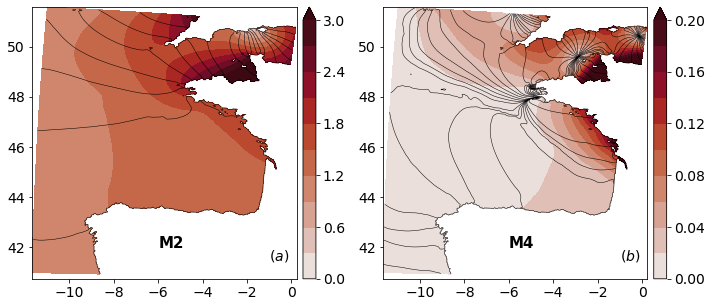

In [22]:
mask = np.isnan(M2_amp)
lon = m2.nav_lon.values
lat = m2.nav_lat.values
#
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
# subplot 1 (M2)
plt.subplots_adjust(wspace=0.1)
levels = np.linspace(0.0, 3, 11)
im1 = axes[0].contourf(lon, lat, M2_amp, levels=levels, vmin=0, vmax=3, extend='max', cmap=cmocean.cm.amp); 
axes[0].contour(lon, lat, M2_pha, colors='k', linewidths=.5)
plt.colorbar(im1, ax=axes[0], pad=0.02)
# subplot 2 (M4)
levels = np.linspace(0.0, 0.2, 11)
im2 = axes[1].contourf(lon, lat, M4_amp, levels=levels, vmin=0, vmax=0.2, extend='max', cmap=cmocean.cm.amp); 
axes[1].contour(lon, lat, M4_pha, colors='k', linewidths=.5)
plt.colorbar(im2, ax=axes[1], pad=0.02)

# annotate subplots
idx = [('$(a)$', 'M2'), ('$(b)$', 'M4')]
for i,ax in enumerate(axes.flat):
        ax.contour(lon, lat, mask, linewidths=0.1, colors='k')
        ax.text(-1, 41.5, idx[i][0], size=14, weight='bold')
        ax.text(-6, 42, idx[i][1], size=15, weight='bold')
        
#save figure
fig.savefig('../_plots/figure2.png',dpi=300,bbox_inches='tight')